## Web scraping and analysis

We will use a package called `BeautifulSoup` to collect the data from the web. Once we've collected data and saved it into a local `.csv` file and we should start with our analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this analysis, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#preprocessing
import string,re
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))
stop_words.extend(['from', 'subject', 're', 'edu', 'use','http'])

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from wordcloud import WordCloud

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | \r\nThe worst cabin experie...
1,✅ Trip Verified | First time flying with Briti...
2,✅ Trip Verified | The latest affront. Stood i...
3,Not Verified | Booked a flight return flight ...
4,✅ Trip Verified | I tried to check in on line...


In [4]:
df = df.drop_duplicates('reviews')
df.shape

(3495, 1)

In [5]:
path = 'D:/JOB PREP/Projects/Data Science at British Airways/'
df.to_csv(path+"data/BA_reviews.csv",index=False)

We have collected 3503 reviews by iterating through the paginated pages on the website.

# Data Cleaning

In [6]:
#lowercase & puntuation
def lowerPunc(element):
    s = ''.join([char for char in element.lower() if char.isalpha() or char.isspace()])
    return s

#remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

#Lemmatization
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [7]:
import nltk
def data_cleaning(df,var):
    # Removed futile text from the data
    df = df[var].str.split('|', 1, expand=True).rename(columns={1:var})
    df[var] = df[var].fillna(df[0])
    df = df.drop(0,axis=1)
    
    #lowercase & puntuation
    df[var] = df[var].apply(lowerPunc)
    
    #remove stopwords
    df[var] = df[var].apply(lambda x: remove_stopwords(x))

    # Remove extra space
    df[var] = df[var].apply(lambda text: re.sub(' +', ' ', text))
    
    #Lemmatization
    df[var] = df[var].apply(lambda text: lemmatize_words(text))
    
    return df

df = data_cleaning(df,'reviews')
df.head()

C:\Users\anjal\AppData\Local\Temp\ipykernel_10176\1793224776.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df = df[var].str.split('|', 1, expand=True).rename(columns={1:var})


,reviews
0,worst cabin experience ever cramped seat low c...
1,first time flying british airway first time fl...
2,latest affront stood first class line hour fin...
3,booked flight return flight london munich dece...
4,tried check line informed possible given reaso...


In [8]:
path = 'D:/JOB PREP/Projects/Data Science at British Airways/'
df.to_csv(path+"data/BA_reviews_processed.csv",index=False)

# Analyse data

### Exploratory Analysis

-  word cloud
using the wordcloud package to get a visual representation of most common words

In [9]:
#!pip install wordcloud

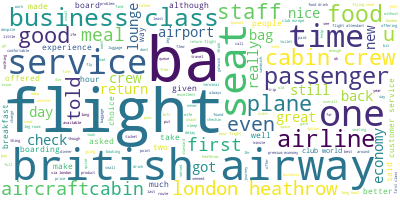

In [10]:
# Join the different processed titles together.
long_string = ','.join(list(df['reviews'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()